No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


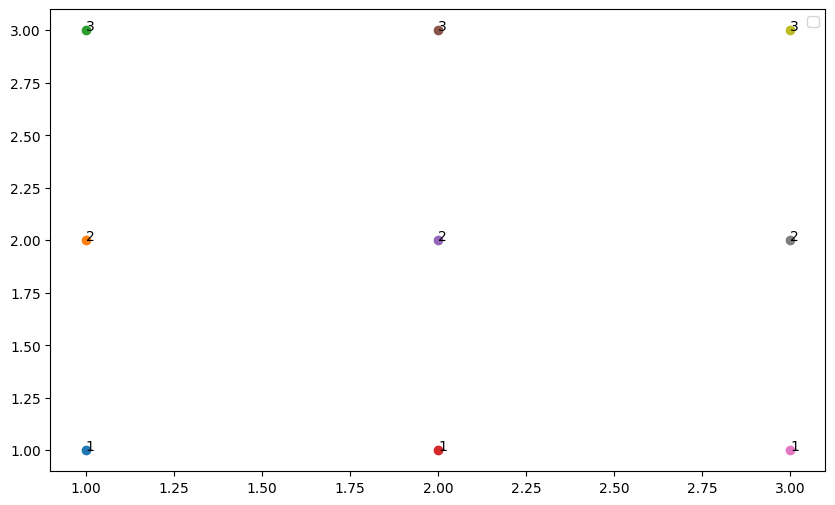

In [48]:
import matplotlib.pyplot as plt

data = {
    1: [1, 2, 3],
    2: [1, 2, 3],
    3: [1, 2, 3],
}

plt.figure(figsize=(10, 6))
for x, y_values in data.items():
    for y in y_values:
        plt.scatter(x, y)
        plt.text(x, y, str(y))
plt.legend()
plt.show()

In [16]:
import pandas as pd

# Load the data
df = pd.read_csv('Alaska_04102020_PRESIDENTOFTHEUNITEDSTATES.csv')

# Display the first few rows
df.head()

,Contest Id,Tabulator Id,Batch Id,Record Id,Precinct,Precinct Portion,rank1,rank2,rank3,rank4,rank5
0,NaN,2,1,1,NaN,1,Joseph R. Biden,Amy Klobuchar,Pete Buttigieg,Tom Steyer,Elizabeth Warren
1,NaN,2,1,2,NaN,1,Joseph R. Biden,skipped,skipped,skipped,skipped
2,NaN,2,1,3,NaN,1,Joseph R. Biden,skipped,skipped,skipped,skipped
3,NaN,2,1,4,NaN,1,Bernie Sanders,Joseph R. Biden,skipped,skipped,skipped
4,NaN,2,1,5,NaN,1,Joseph R. Biden,Elizabeth Warren,skipped,skipped,skipped


<Axes: ylabel='permutation'>

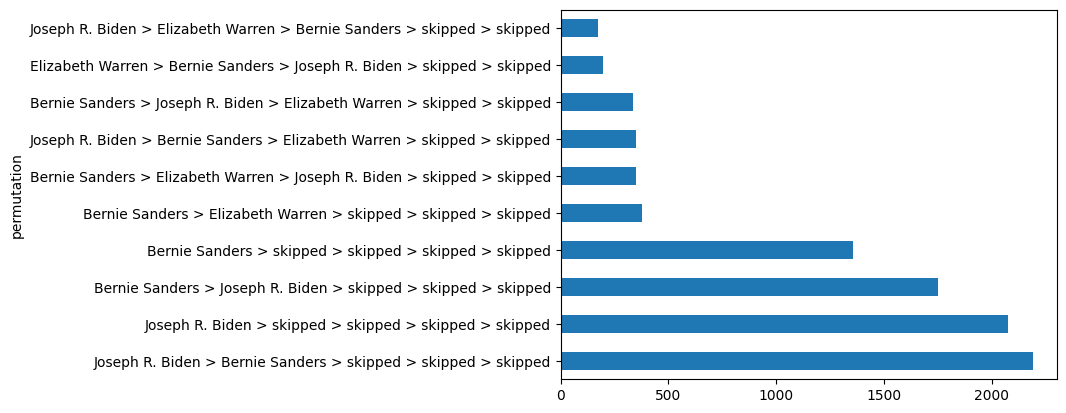

In [27]:
# Concatenate the ranking columns to create a new column 'permutation'
df['permutation'] = df[['rank1', 'rank2', 'rank3', 'rank4', 'rank5']].apply(lambda row: ' > '.join(row.values.astype(str)), axis=1)

# Count the frequency of each permutation and sort them in descending order
permutation_counts = df['permutation'].value_counts()

# Count and plot the top 10 most frequent permutations
permutation_counts.head(10).plot.barh()

In [4]:
# Extract unique candidates from each ranking column
unique_candidates = pd.unique(df[['rank1', 'rank2', 'rank3', 'rank4', 'rank5']].values.ravel('K'))

# Display the unique candidates
unique_candidates

array(['Joseph R. Biden', 'Bernie Sanders', 'Elizabeth Warren',
       'Amy Klobuchar', 'Tulsi Gabbard', 'skipped', 'Undeclared',
       'Pete Buttigieg', 'Michael R. Bloomberg', 'Tom Steyer', 'overvote'],
      dtype=object)

In [5]:
from collections import Counter
import itertools

# Create a list of ranking columns
ranking_columns = ['rank1', 'rank2', 'rank3', 'rank4', 'rank5']

# Initialize a counter to store the counts of each pair
pairwise_counts = Counter()

# Loop over each pair of adjacent ranking columns
for i in range(len(ranking_columns)-1):
    col1 = ranking_columns[i]
    col2 = ranking_columns[i+1]
    # Extract the pairs from the two columns
    pairs = df[[col1, col2]].values.tolist()
    
    # Convert each pair to a tuple and count the occurrences
    pairwise_counts.update(tuple(pair) for pair in pairs if 'skipped' not in pair)

# Convert the counter to a list of tuples and then to a DataFrame for easier analysis
pairwise_counts_list = list(pairwise_counts.items())
pairwise_counts_df = pd.DataFrame(pairwise_counts_list, columns=['Pair', 'Count'])

# Sort the DataFrame by count in descending order
pairwise_counts_df.sort_values('Count', ascending=False, inplace=True)

# Reset the index of the DataFrame
pairwise_counts_df.reset_index(drop=True, inplace=True)

# Display the most common pairs
pairwise_counts_df.head()

,Pair,Count
0,"(Joseph R. Biden, Bernie Sanders)",4659
1,"(Bernie Sanders, Joseph R. Biden)",3783
2,"(Bernie Sanders, Elizabeth Warren)",3247
3,"(Joseph R. Biden, Elizabeth Warren)",2157
4,"(Elizabeth Warren, Pete Buttigieg)",1520
5,"(Elizabeth Warren, Amy Klobuchar)",1491
6,"(Elizabeth Warren, Bernie Sanders)",1320
7,"(Joseph R. Biden, Amy Klobuchar)",1245
8,"(Elizabeth Warren, Joseph R. Biden)",1221
9,"(Amy Klobuchar, Pete Buttigieg)",1132


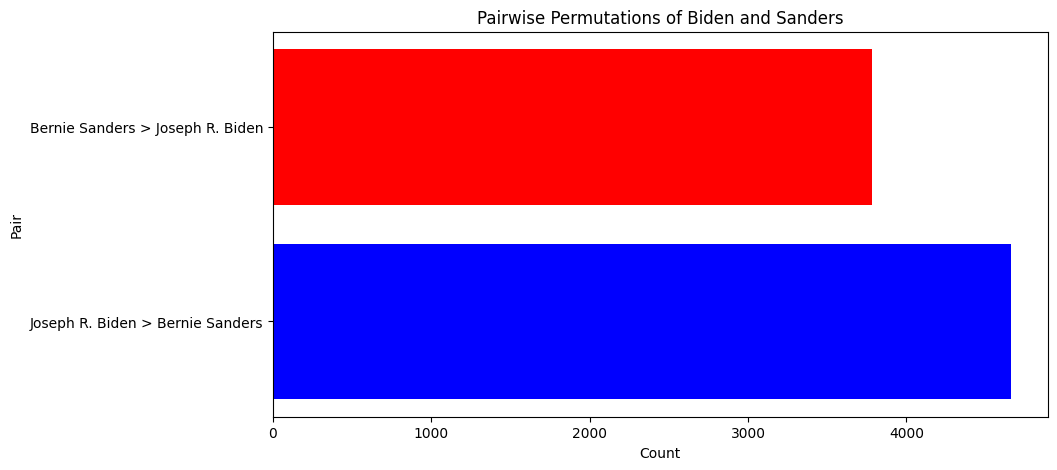

In [6]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only pairs with Biden and Sanders
biden_sanders_df = pairwise_counts_df[pairwise_counts_df['Pair'].apply(lambda pair: set(pair) == {'Joseph R. Biden', 'Bernie Sanders'})]

# Sort the DataFrame so that pairs with Biden first are on the left and pairs with Sanders first are on the right
biden_sanders_df = biden_sanders_df.sort_values('Pair', ascending=False, key=lambda pair: pair.str[0])

# Create a horizontal bar plot
plt.figure(figsize=(10, 5))
plt.barh(biden_sanders_df['Pair'].apply(lambda pair: ' > '.join(pair)), biden_sanders_df['Count'], color=['blue', 'red'])
plt.xlabel('Count')
plt.ylabel('Pair')
plt.title('Pairwise Permutations of Biden and Sanders')
plt.show()

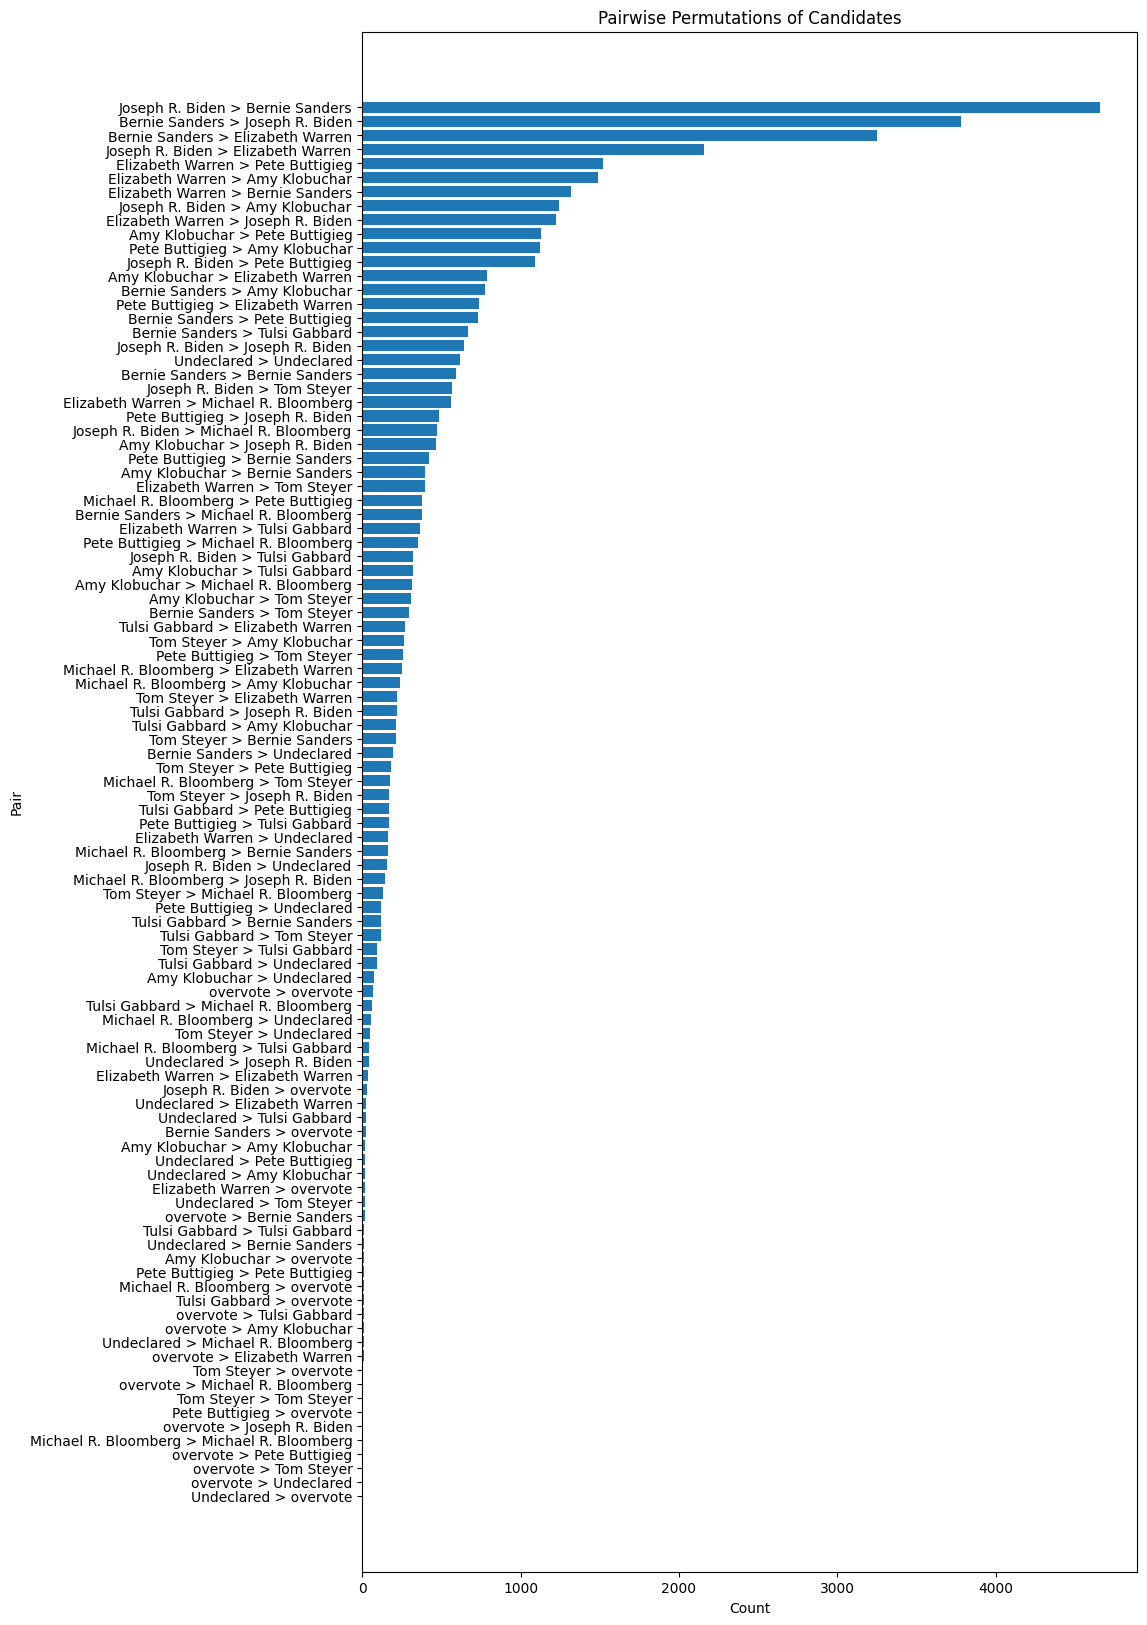

In [7]:
# Sort the DataFrame by count in descending order for better visualization
pairwise_counts_df_sorted = pairwise_counts_df.sort_values('Count', ascending=True)

# Plot
plt.figure(figsize=(10, 20))
plt.barh(pairwise_counts_df_sorted['Pair'].apply(lambda pair: ' > '.join(pair)), pairwise_counts_df_sorted['Count'])
plt.xlabel('Count')
plt.ylabel('Pair')
plt.title('Pairwise Permutations of Candidates')
plt.show()

In [11]:
# Create a subset of the data that contains the most common pair
most_common_pair = ('Joseph R. Biden', 'Bernie Sanders')
subset_df = df[df.apply(lambda row: most_common_pair in [tuple(row[ranking_columns[i:i+2]]) for i in range(len(ranking_columns)-1)], axis=1)]

# Display the first few rows
subset_df.head()

,Contest Id,Tabulator Id,Batch Id,Record Id,Precinct,Precinct Portion,rank1,rank2,rank3,rank4,rank5,permutation
31,NaN,2,1,33,NaN,1,Joseph R. Biden,Bernie Sanders,skipped,skipped,skipped,Joseph R. Biden > Bernie Sanders > skipped > s...
32,NaN,2,1,34,NaN,1,Joseph R. Biden,Bernie Sanders,skipped,skipped,skipped,Joseph R. Biden > Bernie Sanders > skipped > s...
35,NaN,2,1,37,NaN,1,Joseph R. Biden,Bernie Sanders,Elizabeth Warren,Amy Klobuchar,skipped,Joseph R. Biden > Bernie Sanders > Elizabeth W...
37,NaN,2,1,39,NaN,1,Joseph R. Biden,Bernie Sanders,skipped,skipped,skipped,Joseph R. Biden > Bernie Sanders > skipped > s...
39,NaN,2,1,41,NaN,1,Elizabeth Warren,Joseph R. Biden,Bernie Sanders,Amy Klobuchar,Pete Buttigieg,Elizabeth Warren > Joseph R. Biden > Bernie Sa...


In [10]:
# Initialize a counter to store the counts of each pair
subset_pairwise_counts = Counter()

# Loop over each pair of adjacent ranking columns
for i in range(len(ranking_columns)-1):
    col1 = ranking_columns[i]
    col2 = ranking_columns[i+1]
    # Extract the pairs from the two columns
    pairs = subset_df[[col1, col2]].values.tolist()
    
    # Convert each pair to a tuple and count the occurrences
    subset_pairwise_counts.update(tuple(pair) for pair in pairs if 'skipped' not in pair)

# Convert the counter to a list of tuples and then to a DataFrame for easier analysis
subset_pairwise_counts_list = list(subset_pairwise_counts.items())
subset_pairwise_counts_df = pd.DataFrame(subset_pairwise_counts_list, columns=['Pair', 'Count'])

# Sort the DataFrame by count in descending order
subset_pairwise_counts_df.sort_values('Count', ascending=False, inplace=True)

# Reset the index of the DataFrame
subset_pairwise_counts_df.reset_index(drop=True, inplace=True)

# Display the most common pairs
subset_pairwise_counts_df.head()

,Pair,Count
0,"(Joseph R. Biden, Bernie Sanders)",4659
1,"(Bernie Sanders, Elizabeth Warren)",1006
2,"(Elizabeth Warren, Amy Klobuchar)",347
3,"(Elizabeth Warren, Pete Buttigieg)",346
4,"(Bernie Sanders, Amy Klobuchar)",338


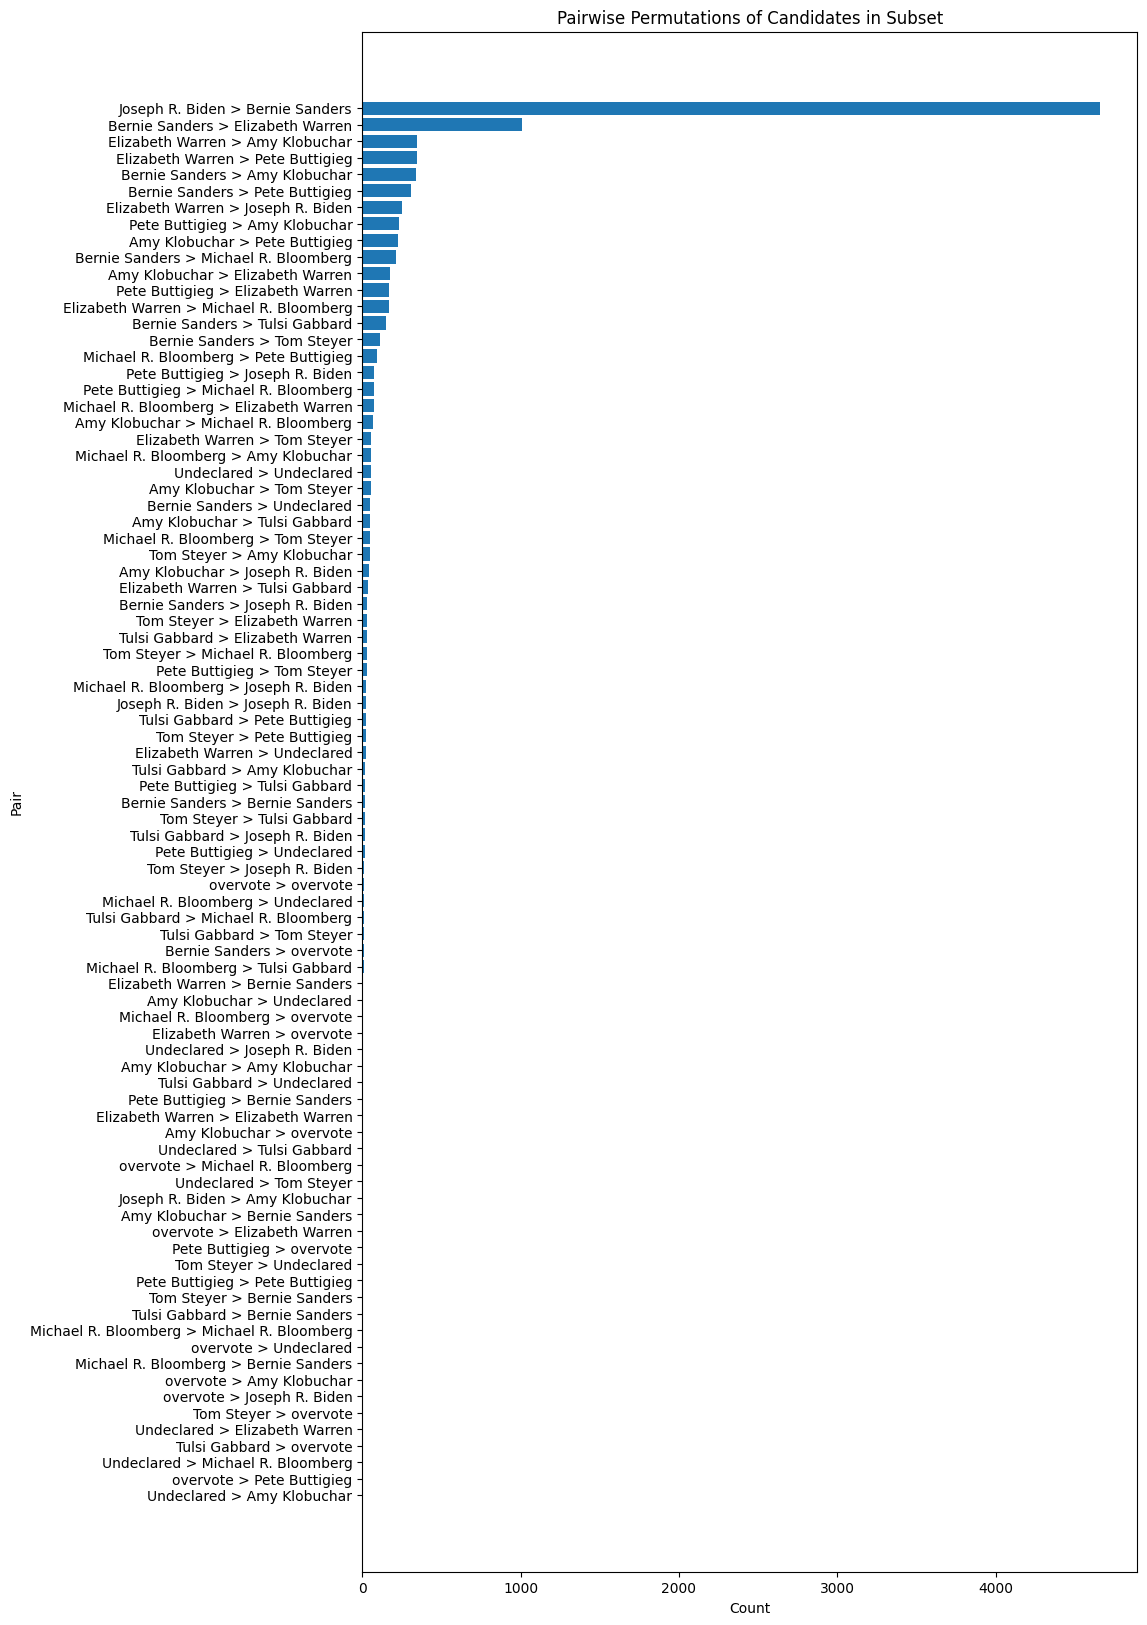

In [12]:
# Sort the DataFrame by count in descending order for better visualization
subset_pairwise_counts_df_sorted = subset_pairwise_counts_df.sort_values('Count', ascending=True)

# Plot
plt.figure(figsize=(10, 20))
plt.barh(subset_pairwise_counts_df_sorted['Pair'].apply(lambda pair: ' > '.join(pair)), subset_pairwise_counts_df_sorted['Count'])
plt.xlabel('Count')
plt.ylabel('Pair')
plt.title('Pairwise Permutations of Candidates in Subset')
plt.show()

In [ ]:
permuation_frequency = {}
for col in ranking_columns:
    permuation_frequency[col] = df[col].value_counts()

print(permuation_frequency)